In [1]:
#import librairies


import streamlit as st
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('C:\\Ressources\\Data analyst Portfolio data\\buld a machine learning web app\\stack-overflow-developer-survey-2023\\survey_results_public.csv')

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
#we want to work with the columns "country", "Employment", "Edlevel", "YearscodePro", "convertedcompyearly" as "salary"

df = df[["Country","Employment","EdLevel","YearsCodePro","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis=1)

In [5]:
df = df[df["Salary"].notnull()]

In [6]:
df = df.dropna(subset=['YearsCodePro'])
df = df.dropna(subset=['Employment'])

In [7]:
miss_values = df.isnull().sum()
print(miss_values)

Country         0
Employment      0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64


In [8]:
df['Employment'].value_counts()

Employed, full-time                                                                             39155
Independent contractor, freelancer, or self-employed                                             3880
Employed, full-time;Independent contractor, freelancer, or self-employed                         3282
Employed, part-time                                                                               899
Independent contractor, freelancer, or self-employed;Employed, part-time                          238
Employed, full-time;Employed, part-time                                                           152
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
Retired                                                                                            33
I prefer not to say                                                                                33
Independent contractor, freelancer, or self-employed;Retired                      

In [9]:
#specify condition for full time

df = df[df["Employment"] == "Employed, full-time"]

In [10]:
df.head()

,Country,Employment,EdLevel,YearsCodePro,Salary
1,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,"Employed, full-time",Some college/university study without earning ...,21,96828.0
6,United States of America,"Employed, full-time",Some college/university study without earning ...,3,135000.0


In [11]:
df = df.drop("Employment", axis=1)

In [12]:
df['Country'].value_counts()


United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: Country, Length: 165, dtype: int64

In [13]:
#transformation of country
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
      

In [14]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440
Norway  

C:\Users\AA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


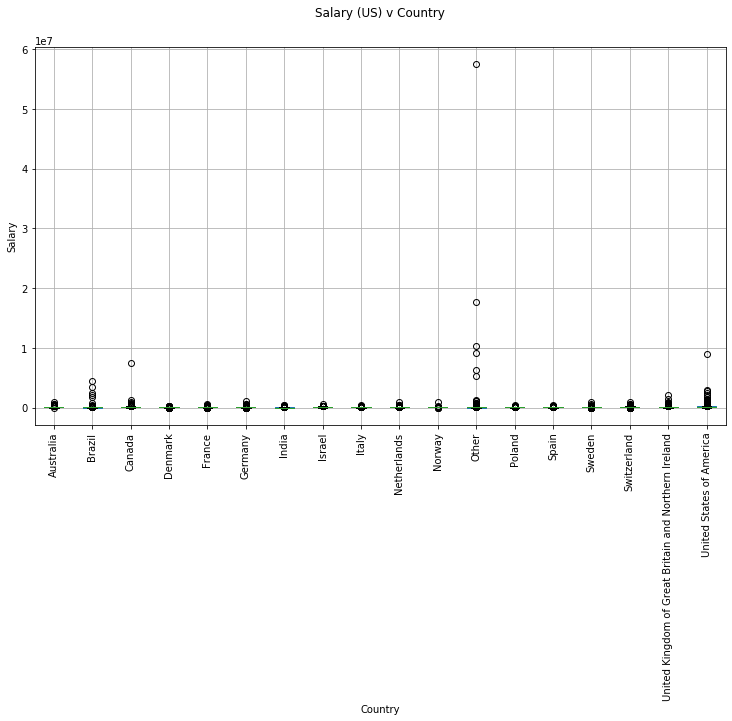

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df = df[df["Salary"] <= 150000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

C:\Users\AA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


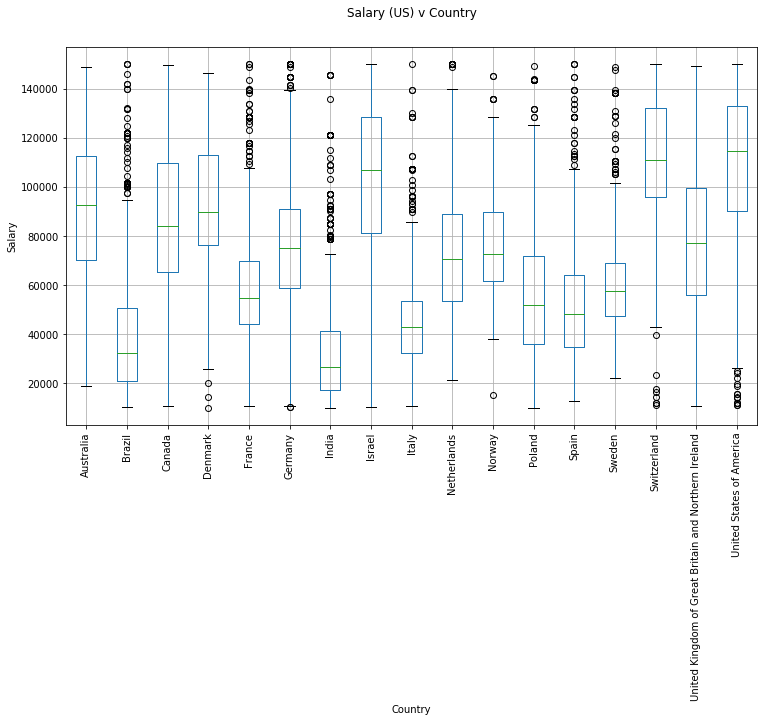

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
df["YearsCodePro"].unique()

array(['21', '3', '9', 'Less than 1 year', '10', '2', '6', '14', '5',
       '15', '7', '13', '28', '24', '25', '12', '4', '8', '18', '30',
       '19', '23', '20', '17', '38', '33', '29', '22', '1', '11', '27',
       '34', '16', '42', '31', '39', '36', '40', '26', '32', '44', '37',
       '35', '48', '45', '50', '43', '41', '46', 'More than 50 years',
       '49', '47'], dtype=object)

In [19]:
#transformation of yearscodepro

def clean_experience(x) : 
    if x== 'More than 50 years':
        return 50
    if x== 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [20]:
df["EdLevel"].unique()

array(['Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [21]:
#transformation of edlevel

def clean_education(x) : 
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post Grad'
    return 'less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [22]:
df["EdLevel"].unique()

array(['less than a Bachelors', 'Bachelor’s degree', 'Master’s degree',
       'Post Grad'], dtype=object)

In [23]:
#We define the variables of our model 

x = df.drop("Salary", axis=1)  #predictors
y = df["Salary"]               #explained variable

In [24]:
#We import libraries for regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
#base division into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 


In [26]:
from sklearn.preprocessing import LabelEncoder


In [27]:
print(x_train)

                        Country                EdLevel  YearsCodePro
70161  United States of America  less than a Bachelors           6.0
6865                     Canada      Bachelor’s degree          23.0
18396  United States of America  less than a Bachelors           5.0
67800                   Germany        Master’s degree           6.0
29913  United States of America  less than a Bachelors          31.0
...                         ...                    ...           ...
42398  United States of America      Bachelor’s degree          33.0
82627                    Sweden      Bachelor’s degree           5.0
19792                     Italy        Master’s degree           0.5
3144   United States of America              Post Grad           5.0
57532                     Italy      Bachelor’s degree          19.0

[18325 rows x 3 columns]


In [28]:
x_train['EdLevel'].unique()

array(['less than a Bachelors', 'Bachelor’s degree', 'Master’s degree',
       'Post Grad'], dtype=object)

In [29]:
educ = LabelEncoder()
x_train['EdLevel'] = educ.fit_transform(x_train['EdLevel'])

In [30]:
x_train['EdLevel'].unique()

array([3, 0, 1, 2])

In [31]:
x_train["Country"].unique()

array(['United States of America', 'Canada', 'Germany', 'Netherlands',
       'United Kingdom of Great Britain and Northern Ireland', 'Sweden',
       'India', 'France', 'Italy', 'Australia', 'Poland', 'Norway',
       'Spain', 'Denmark', 'Brazil', 'Israel', 'Switzerland'],
      dtype=object)

In [33]:
countr = LabelEncoder()
x_train['Country'] = countr.fit_transform(x_train['Country'])

In [34]:
x_train["Country"].unique()

array([16,  2,  5,  9, 15, 13,  6,  4,  8,  0, 11, 10, 12,  3,  1,  7, 14])

In [35]:
print(x_train)

       Country  EdLevel  YearsCodePro
70161       16        3           6.0
6865         2        0          23.0
18396       16        3           5.0
67800        5        1           6.0
29913       16        3          31.0
...        ...      ...           ...
42398       16        0          33.0
82627       13        0           5.0
19792        8        1           0.5
3144        16        2           5.0
57532        8        0          19.0

[18325 rows x 3 columns]


In [36]:
x_train['EdLevel']=x_train['EdLevel'].astype(float)
x_train['Country']=x_train['Country'].astype(float)

In [37]:
print(x_train)

       Country  EdLevel  YearsCodePro
70161     16.0      3.0           6.0
6865       2.0      0.0          23.0
18396     16.0      3.0           5.0
67800      5.0      1.0           6.0
29913     16.0      3.0          31.0
...        ...      ...           ...
42398     16.0      0.0          33.0
82627     13.0      0.0           5.0
19792      8.0      1.0           0.5
3144      16.0      2.0           5.0
57532      8.0      0.0          19.0

[18325 rows x 3 columns]


In [38]:
#Create an instance of the model
linear_reg = LinearRegression()

#training our model on training data
linear_reg.fit(x_train, y_train)


LinearRegression()

In [39]:
print(x_test)

                        Country                EdLevel  YearsCodePro
51524                    Norway      Bachelor’s degree           0.5
24826                    Canada      Bachelor’s degree           6.0
20208                     Italy  less than a Bachelors          10.0
66346                    Poland      Bachelor’s degree           4.0
71147  United States of America      Bachelor’s degree           7.0
...                         ...                    ...           ...
47157                   Germany        Master’s degree           2.0
65778                    Sweden  less than a Bachelors          12.0
25179  United States of America  less than a Bachelors           7.0
73404                   Germany        Master’s degree           6.0
42576                   Germany        Master’s degree           3.0

[4582 rows x 3 columns]


In [40]:
x_test['EdLevel'] = educ.transform(x_test['EdLevel'])

In [41]:
x_test['EdLevel'].unique()

array([0, 3, 1, 2])

In [42]:
x_test['Country'] = countr.transform(x_test['Country'])

In [43]:
x_test['EdLevel']=x_test['EdLevel'].astype(float)
x_test['Country']=x_test['Country'].astype(float)

In [44]:
#test set predictions
y_pred = linear_reg.predict(x_test)


In [45]:
# Calculation of evaluation metrics 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [46]:
#Root Mean Squared Error (RMSE) calculation

error = np.sqrt(mse)
print(error)

31339.946141646975


In [47]:
#estimation of a new decision tree model

from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)

dec_tree_reg.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [48]:
y_pred_dec = dec_tree_reg.predict(x_test)

In [49]:
#Root Mean Squared Error (RMSE) calculation

mse_dec = mean_squared_error(y_test, y_pred_dec)
error = np.sqrt(mse_dec)
print(error)

24356.91187309609


In [50]:
#estimating a new model based on randomforest

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)

random_forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [51]:
y_pred_rdf = random_forest_reg.predict(x_test)

In [52]:
mse_rdf = mean_squared_error(y_test, y_pred_rdf)
error = np.sqrt(mse_rdf)
print(error)

24026.279729294085


In [53]:
#finding the best estimation parameters for random forest

from sklearn.model_selection import GridSearchCV


# Define the hyperparameters to be tested
param_grid = {'n_estimators': [50, 100, 150],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}


In [54]:
# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=0)

# Configure grid search
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Run grid search on training data
gs.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [55]:
# show the best hyperparameters
print("Meilleurs hyperparamètres :", gs.best_params_)


Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [56]:
#Apply the best parameters obtained with the best_estimator_ attribute to our model.
rf = gs.best_estimator_

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [57]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
error = np.sqrt(mse_rf)
print(error)

23293.58426010925


In [59]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])

In [60]:
print(X)

[['United States of America' 'Master’s degree' '15']]


In [61]:
X[:,0] = countr.transform(X[:,0])
X[:,1] = educ.transform(X[:,1])
X = X.astype(float)
X

array([[16.,  1., 15.]])

In [62]:
prediction = rf.predict(X)
print(prediction)

[127754.35780969]


C:\Users\AA\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [63]:
#Save the selected model 

import pickle

In [64]:
#creating a data dictionary with the model, labelencoder for country and education
data = {"model": rf, "countr": countr, "educ": educ}

#open a file 'saved_steps.pkl1' which will contain the 'data' dictionary as a file, thanks to the pickle module
with open('saved_steps1.pkl', 'wb') as file:
    pickle.dump(data, file)

In [65]:
#verify our backup
with open('saved_steps1.pkl', 'rb') as file:
    data = pickle.load(file)
    
rf_loaded1 = data["model"]    
countr = data["countr"]
educ = data["educ"]

In [66]:
#make a prediction
y_pred = rf_loaded1.predict(X)
print(y_pred)

[127754.35780969]


C:\Users\AA\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
